## ПЗ 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [2]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# Relu и ее производная
def ReLU(x):
         return x  *  (x  >  0)
    
def relu_deriv(x):
    return x>0

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [3]:

### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
#print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
#g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
#plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
#x = normalize(x.as_matrix())
x = normalize(x.values)
#x = x.to_numpy()

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Параметры вебинара.

**В коде есть ошибка (на мой взгляд, если не прав спокойно отнесусь к "неуд" за эту работу), а именно:<br>
функция производной сигмоида возвращает $sigmoid(x)*(1 - sigmoid(x))$, а в коде (Шаг 3) аргументом этой функции являются не входные параметры, а сигмоид от входных параметров. Просто для примера (часть кода): $$layer1 = sigmoid(layer0 @ w0)$$$$layer1\_delta = layer1\_error * sigmoid\_deriv(layer1) = layer1\_error * (sigmoid(sigmoid(layer0 @ w0))*(1 - sigmoid(sigmoid(layer0 @ w0))))$$Поэтому в своем коде я использую функцию производной $x * (1 - x)$.**


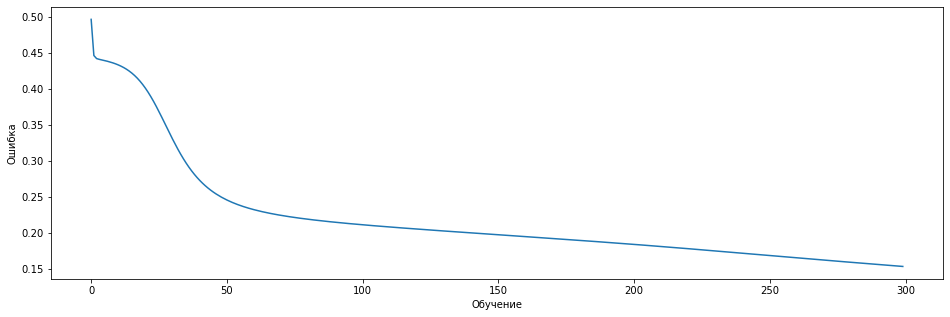

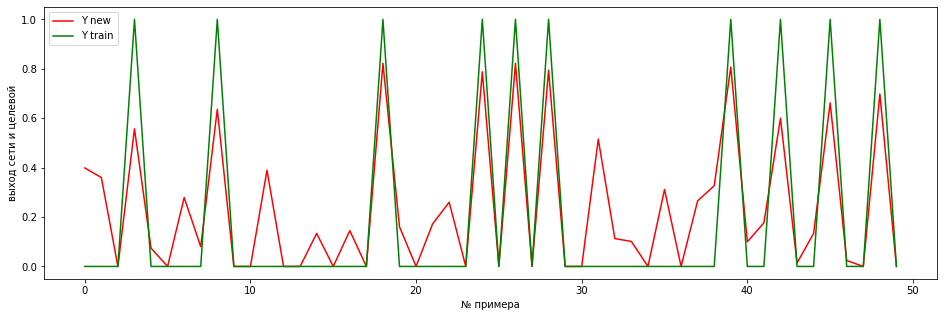

Аккуратность нейронной сети 84.71%


In [4]:
### Шаг 3. Обученние нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 5 # n_n


# присваевание случайных весов
w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, n_n выхода
w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - n_n входов, 3 выхода

# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(300):

    # прямое распространение(feed forward)
    layer0 = X_train
    #layer1 = sigmoid(np.dot(layer0, w0))
    layer1 = sigmoid(layer0 @ w0)
    layer2 = sigmoid(layer1 @ w1)

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    #layer1_error = layer2_delta.dot(w1.T)
    layer1_error = layer2_delta @ w1.T
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T @ layer2_delta * n
    w0 += layer0.T @ layer1_delta * n
    # метрика модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")





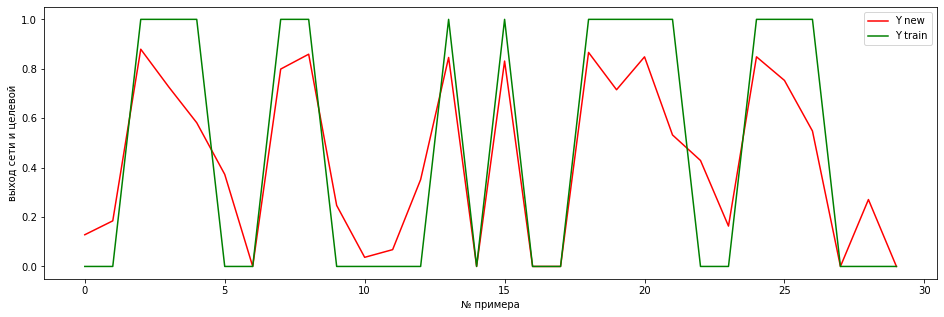

Аккуратность нейронной сети на тесте 81.91%


In [5]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(layer0_t @ w0)
layer2_t = sigmoid(layer1_t @ w1)
layer2_error_t = y_test - layer2_t
    
    
N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

In [6]:
# переопределил функцию производной сигмоида
def sigmoid_deriv(x):
    return x * (1 - x)

### Изменяем параметры

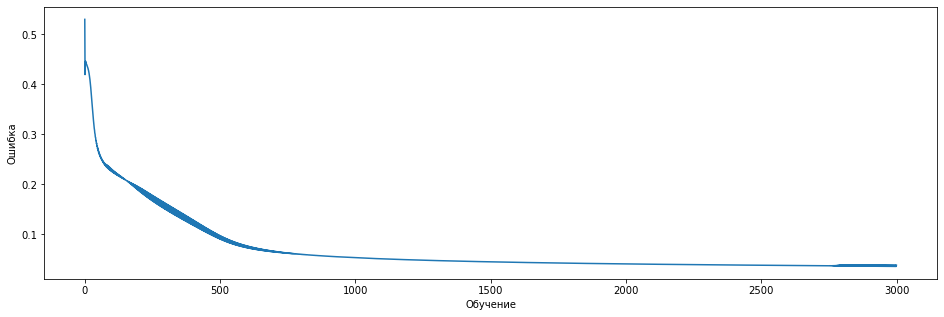

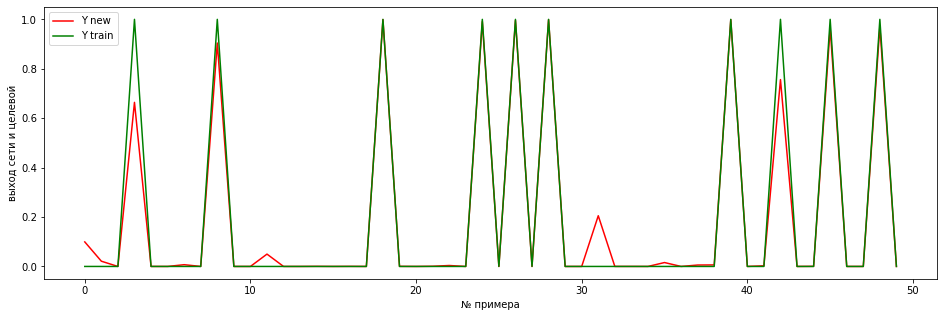

Аккуратность нейронной сети 96.16%


In [30]:
### Шаг 3. Обученние нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 10 # n_n


# присваевание случайных весов
w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, n_n выхода
w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - n_n входов, 3 выхода

# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(3000):

    # прямое распространение(feed forward)
    layer0 = X_train
    #layer1 = sigmoid(np.dot(layer0, w0))
    layer1 = sigmoid(layer0 @ w0)
    layer2 = sigmoid(layer1 @ w1)

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    #layer1_error = layer2_delta.dot(w1.T)
    layer1_error = layer2_delta @ w1.T
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T @ layer2_delta * n
    w0 += layer0.T @ layer1_delta * n
    # метрика модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")


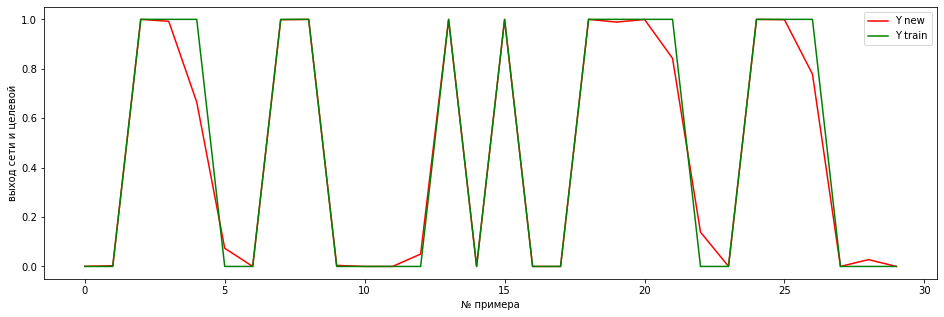

Аккуратность нейронной сети на тесте 97.2%


In [31]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(layer0_t @ w0)
layer2_t = sigmoid(layer1_t @ w1)
layer2_error_t = y_test - layer2_t
    
    
N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

### Увеличиваем количество слоев

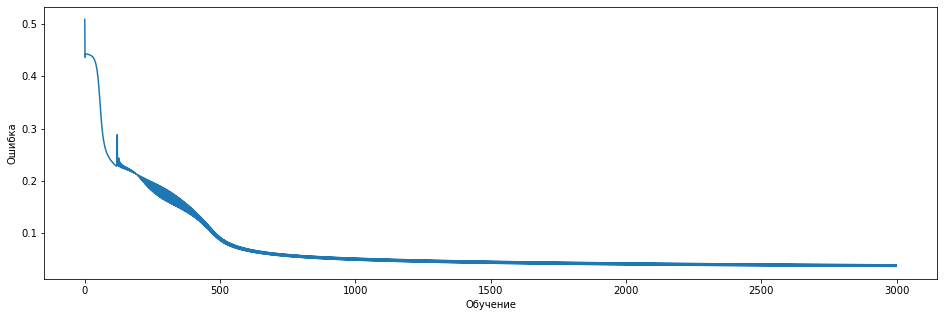

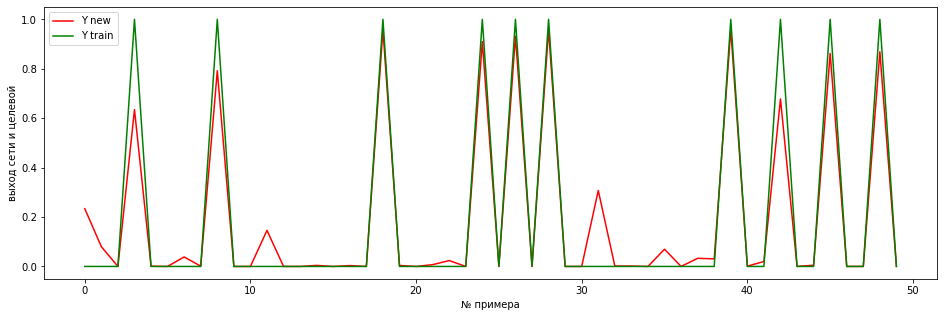

Аккуратность нейронной сети 96.05%


In [152]:
### Шаг 3. Обученние нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 5 # n_n


# присваевание случайных весов
w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, n_n выхода
w1 = 2*np.random.random((neuron_numb, neuron_numb)) - 1
w2 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - n_n входов, 3 выхода

# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(3000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(layer0 @ w0)
    layer2 = sigmoid(layer1 @ w1)
    layer3 = sigmoid(layer2 @ w2)

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer3_error = y_train - layer3 # производная функции потерь = производная квадратичных потерь 
    layer3_delta = layer3_error * sigmoid_deriv(layer3)
    
    layer2_error = layer3_delta @ w2.T
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta @ w1.T
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w2 += layer2.T @ layer3_delta * n
    w1 += layer1.T @ layer2_delta * n
    w0 += layer0.T @ layer1_delta * n
    
    # метрика модели
    error = np.mean(np.abs(layer3_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")


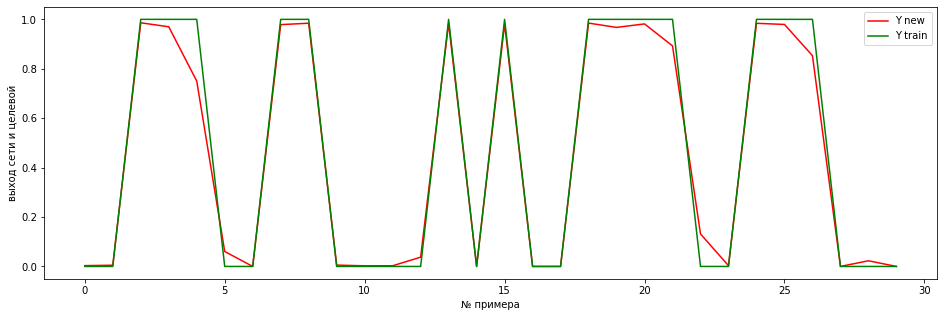

Аккуратность нейронной сети на тесте 97.63%


In [153]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(layer0_t @ w0)
layer2_t = sigmoid(layer1_t @ w1)
layer3_t = sigmoid(layer2_t @ w2)

layer3_error_t = y_test - layer3_t
    
    
N = 50
plt.figure(figsize = (16,5))
plt.plot(layer3_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

# метрика модели
error_t = np.mean(np.abs(layer3_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

### Выводы:

К увеличению точности нейронной сети приводит:<br>
* увеличение количество эпох.<br>
Я использовал 3000 эпох, но если посмотреть на график ошибок то хватило бы я думаю и 2000 эпох, а для сети с дополнительным слоем и 1000.
* количество нейронов.<br>
Я использовал 10 нейронов, потому что дальнейшее увеличение не давало ни какого эфекта. В сети с дополнительным слоем я снизил количество нейронов до 5.

Пробовал настраивать скорость обучения. Сильное уменьшенине, как впрочем и сильное увеличение привело к ухудшению точности сети.

